In [ ]:
!pip install onnxruntime


In [26]:
from google.colab import files

uploaded = files.upload()  # User uploads image
image_path = list(uploaded.keys())[0]  # Get uploaded file name

print(f"Uploaded file: {image_path}")


Saving captain.png to captain.png
Uploaded file: captain.png


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import onnxruntime as ort

model_path = '/content/drive/MyDrive/Colab Notebooks/AnimeGANv3_Hayao_STYLE_36.onnx'
session = ort.InferenceSession(model_path, providers=['CPUExecutionProvider'])

print("ONNX Model Loaded Successfully!")


ONNX Model Loaded Successfully!


In [29]:
import cv2
import numpy as np

def process_image(img):
    h, w = img.shape[:2]

    # Ensure dimensions are divisible by 8 to avoid broadcasting errors
    def to_8s(x):
        return max(256, x - x % 8)

    new_w, new_h = to_8s(w), to_8s(h)
    img = cv2.resize(img, (new_w, new_h))

    print(f"Resized image from {w}x{h} to {new_w}x{new_h} to fix dimension issues")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 127.5 - 1.0
    return img

def load_test_data(image_path):
    img0 = cv2.imread(image_path)
    img = process_image(img0)
    img = np.expand_dims(img, axis=0)
    return img, img0.shape[:2]

image_matrix, original_size = load_test_data(image_path)
print("Image Successfully Loaded & Processed!")


Resized image from 597x685 to 592x680 to fix dimension issues
Image Successfully Loaded & Processed!


In [30]:
def convert(img, scale):
    x = session.get_inputs()[0].name
    fake_img = session.run(None, {x: img})[0]

    images = (np.squeeze(fake_img) + 1.) / 2 * 255
    images = np.clip(images, 0, 255).astype(np.uint8)

    output_image = cv2.resize(images, (scale[1], scale[0]))
    return cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

output_image = convert(image_matrix, original_size)
print("Image Successfully Processed!")


Image Successfully Processed!


In [31]:
def convert(img, scale):
    x = session.get_inputs()[0].name
    fake_img = session.run(None, {x: img})[0]

    images = (np.squeeze(fake_img) + 1.) / 2 * 255
    images = np.clip(images, 0, 255).astype(np.uint8)

    output_image = cv2.resize(images, (scale[1], scale[0]))
    return cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

output_image = convert(image_matrix, original_size)
print("Image Successfully Processed!")


Image Successfully Processed!


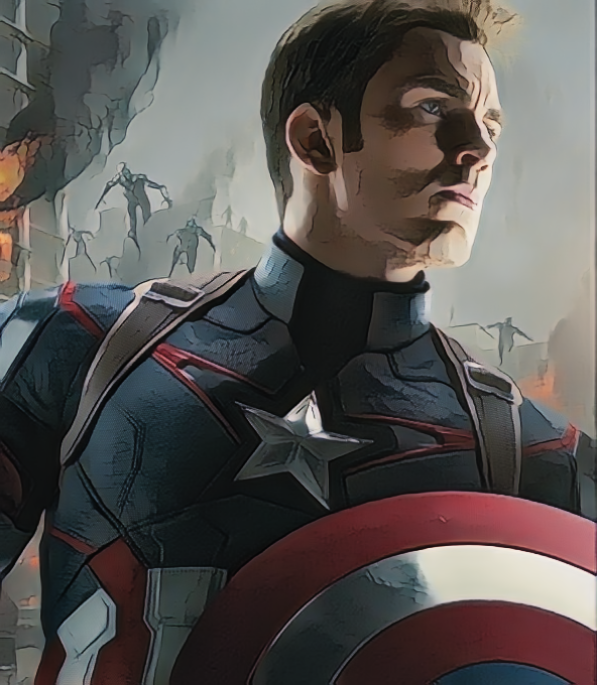

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from google.colab.patches import cv2_imshow

cv2_imshow(output_image)  # Display the processed image

cv2.imwrite("processed_output.jpg", output_image)
files.download("processed_output.jpg")  # Provide download link
